In [1]:
# More distance stuff
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
# Importing GemPy
import gempy as gp
# Embedding matplotlib figures in the notebooks
%matplotlib inline
# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
os.pardir = '../..'

In [3]:
res = [5,5,5]
# set resolution, extent and input data
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=res, 
                        path_o = os.pardir+"/data/input_data/jan_models/model2b_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model2b_surface_points.csv") 

Active grids: ['regular']


In [4]:
#F4B400
#DB4437
#4285F4
geo_data.surfaces.colors.change_colors({"rock1": '#DB4437', "rock2": "#4285F4", "basement": "#F4B400"})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Default series,1,False,#DB4437,1
1,rock2,Default series,2,False,#4285F4,2
2,basement,Basement,1,True,#F4B400,3


In [5]:
# define series and assign surfaces
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Strat_Series,1,False,#DB4437,1
1,rock2,Strat_Series,2,False,#4285F4,2
2,basement,Basement_Series,1,True,#F4B400,3


In [6]:
# define the interpolator
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [7]:
#gp.plot.plot_data(geo_data)

In [8]:
#calcualte the solution
sol = gp.compute_model(geo_data, compute_mesh=False)

In [9]:
res[0]

5

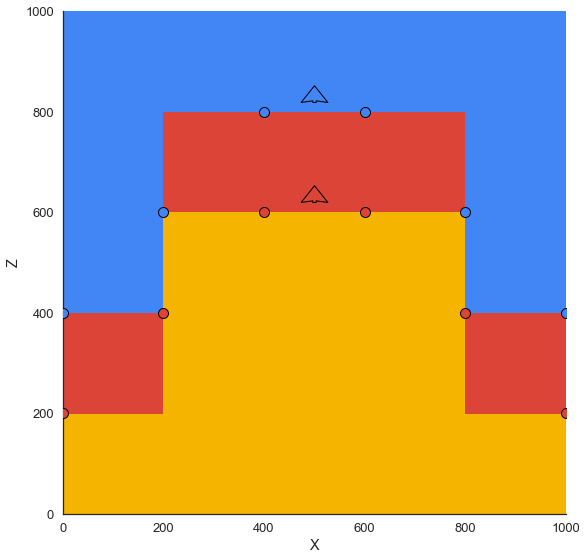

In [10]:
gp.plot.plot_section(geo_data, cell_number=int(res[0]/2))

In [11]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,1],sol.grid.regular_grid.values[:,2], c=sol.lith_block, cmap='viridis')

In [12]:
# TODO:
# Get correct gradient field 
# get ?rotation? in x and y direction
# convert to gempy readable orientations
# interpolate scalar field in x and y direction

# Checks:
# check with non-aligned models
# check with complex models

# Further:
# automate with gempy interpolator function
# implement as distance metric
# use for kriging


In [13]:
'''
# scalar field as meshgrid
test = sol.scalar_field_matrix.reshape((5,5,5))

# calculate gradient
gx, gy, gz = np.gradient(test)

# get coordinates
x =  np.unique(sol.grid.regular_grid.values[:,0])
y =  np.unique(sol.grid.regular_grid.values[:,1])
z =  np.unique(sol.grid.regular_grid.values[:,2])

# I swtich X and Y here (miguel: depends on matrix/array indexing/notation)
# figure that out later
Y, X, Z = np.meshgrid(x, y, z)
'''

'\n# scalar field as meshgrid\ntest = sol.scalar_field_matrix.reshape((5,5,5))\n\n# calculate gradient\ngx, gy, gz = np.gradient(test)\n\n# get coordinates\nx =  np.unique(sol.grid.regular_grid.values[:,0])\ny =  np.unique(sol.grid.regular_grid.values[:,1])\nz =  np.unique(sol.grid.regular_grid.values[:,2])\n\n# I swtich X and Y here (miguel: depends on matrix/array indexing/notation)\n# figure that out later\nY, X, Z = np.meshgrid(x, y, z)\n'

In [14]:
'''
# This somehow works for the x direction, but more clear way wath propper vector rotation should be nicer
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,1],sol.grid.regular_grid.values[:,2], c=sol.lith_block, cmap='viridis')

# switch to naming convention, scale
u=gx*500
v=gy*500
w=gz*500

#ax.quiver(X, Y, Z, np.flip(u.T), np.flip(v.T), np.flip(w.T)) #normalize=True)

# for some reason I have to switch X and Y to get it right
ax.quiver(X, Y, Z, u, v, w, color='black') #normalize=True)

# x direction? This seems to do it...
ux = u.T
ax.quiver(X, Y, Z, w, v, np.flip(ux.T), color='red')

#ax.quiver(Y[4,:,0], X[4,:,0], Z[4,:,0], ux[4,:,0], v[4,:,0], w[4,:,0])
#ax.quiver(Y[0,:,0], X[0,:,0], Z[0,:,0], ux[0,:,0], v[0,:,0], w[0,:,0])
#ax.quiver(Y[2,:,2], X[2,:,2], Z[2,:,2], ux[2,:,2], v[2,:,2], w[2,:,2])

# y direction? 
#vx = v.T
#ax.quiver(Y, X, Z, u, np.flip(vx.T), w, color='blue')

plt.show()
'''

"\n# This somehow works for the x direction, but more clear way wath propper vector rotation should be nicer\nfig = plt.figure(figsize=(12,12))\nax = fig.gca(projection='3d')\nax.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,1],sol.grid.regular_grid.values[:,2], c=sol.lith_block, cmap='viridis')\n\n# switch to naming convention, scale\nu=gx*500\nv=gy*500\nw=gz*500\n\n#ax.quiver(X, Y, Z, np.flip(u.T), np.flip(v.T), np.flip(w.T)) #normalize=True)\n\n# for some reason I have to switch X and Y to get it right\nax.quiver(X, Y, Z, u, v, w, color='black') #normalize=True)\n\n# x direction? This seems to do it...\nux = u.T\nax.quiver(X, Y, Z, w, v, np.flip(ux.T), color='red')\n\n#ax.quiver(Y[4,:,0], X[4,:,0], Z[4,:,0], ux[4,:,0], v[4,:,0], w[4,:,0])\n#ax.quiver(Y[0,:,0], X[0,:,0], Z[0,:,0], ux[0,:,0], v[0,:,0], w[0,:,0])\n#ax.quiver(Y[2,:,2], X[2,:,2], Z[2,:,2], ux[2,:,2], v[2,:,2], w[2,:,2])\n\n# y direction? \n#vx = v.T\n#ax.quiver(Y, X, Z, u, np.flip(vx.T), w, co

In [15]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

In [16]:
# scalar field as meshgrid
test = sol.scalar_field_matrix.reshape(res)

# calculate gradient
gx, gy, gz = np.gradient(test)

# get coordinates
x =  np.unique(sol.grid.regular_grid.values[:,0])
y =  np.unique(sol.grid.regular_grid.values[:,1])
z =  np.unique(sol.grid.regular_grid.values[:,2])

# I swtich X and Y here (miguel: depends on matrix/array indexing/notation)
# figure that out later
Y, X, Z = np.meshgrid(x, y, z)

In [17]:
# x axis rotation (around y axis)
vectors = np.array([gx.reshape(int(res[0]**3)),gy.reshape(int(res[0]**3)),gz.reshape(int(res[0]**3))])
vectors = np.swapaxes(vectors, 0, 1)

rot_vectors_x = np.zeros(vectors.shape)

for i in range(len(vectors)):
    #print(vectors[i])
    vec, axis, theta = (vectors[i]), [0,1,0], np.pi/2
    M0 = M(axis, theta)
    rot_vectors_x[i]=np.dot(M0,vec)

#print(rot_vectors_x)
gx_x = rot_vectors_x[:,0].reshape(res)
gy_x = rot_vectors_x[:,1].reshape(res)
gz_x = rot_vectors_x[:,2].reshape(res)

In [18]:
# have to figure out whaat is correct here
# Do I want a rotation around the axis (A) -until now does not seem 100% perpendicular
# or in respect to first two calculated vectors (B) - perpendicular but correct?
# test with warped shape, that shows alteration in multiple directions

# Time for a new model ???

rot_vectors_y = np.zeros(vectors.shape)

for i in range(len(vectors)):
    #print(vectors[i])
    #vec, axis, theta = (vectors[i]), [1,0,0], np.pi/2
    #vec, axis, theta = (vectors[i]), [0,0,1], np.pi/2
    vec, axis, theta = (vectors[i]), rot_vectors_x[i], np.pi/2
    M0 = M(axis, theta)
    rot_vectors_y[i]=np.dot(M0,vec)

#print(rot_vectors_x)
gx_y = rot_vectors_y[:,0].reshape(res)
gy_y = rot_vectors_y[:,1].reshape(res)
gz_y = rot_vectors_y[:,2].reshape(res)

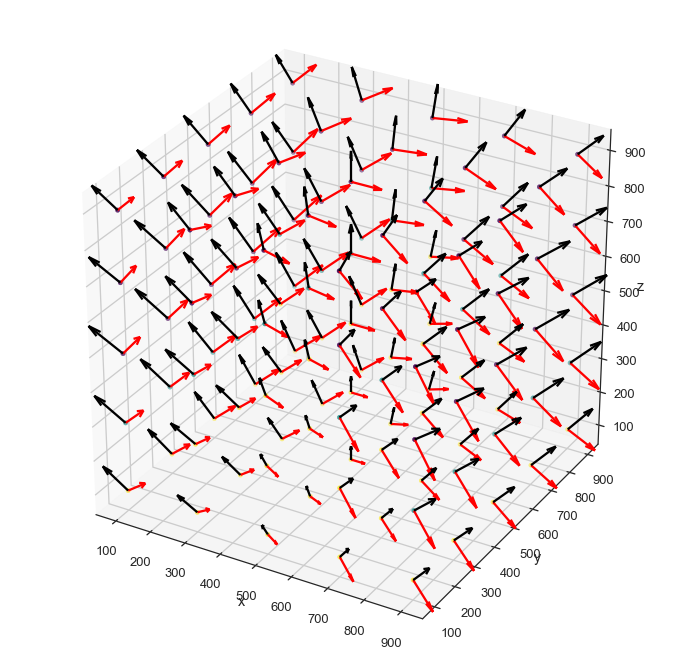

In [19]:
#%matplotlib notebook
%matplotlib inline

# This somehow works for the x direction, but more clear way wath propper vector rotation should be nicer
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.scatter(sol.grid.regular_grid.values[:,0], sol.grid.regular_grid.values[:,1],sol.grid.regular_grid.values[:,2], c=sol.lith_block, cmap='viridis')

# switch to naming convention, scale
factor=500

u=gx*factor
v=gy*factor
w=gz*factor

u_x=gx_x*factor
v_x=gy_x*factor
w_x=gz_x*factor

u_y=gx_y*factor
v_y=gy_y*factor
w_y=gz_y*factor

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# plot arrows
# main(z)
ax.quiver(X, Y, Z, u, v, w, color='black')
# x direction
ax.quiver(X, Y, Z, u_x, v_x, w_x, color='red')
# y direction
#ax.quiver(X, Y, Z, u_y, v_y, w_y, color='blue')

plt.show()
#ax.view_init(90,0)


In [20]:
# OK sweet, next step to use gempy to calculate the corresponding scalar fields

In [21]:
# first of all i need to convert the orientations to a gempy readable format???

In [22]:
# and check how that looks

In [23]:
# set resolution, extent and input data
geo_data2 = gp.create_data([0,1000,0,1000,0,1000],resolution=[10,10,10])
                        #path_o = os.pardir+"/data/input_data/jan_models/model2b_orientations.csv",
                        #path_i = os.pardir+"/data/input_data/jan_models/model2b_surface_points.csv") 


Active grids: ['regular']


In [24]:
geo_data2.add_surfaces("single")
geo_data2.add_surfaces("Basement")

,surface,series,order_surfaces,isBasement,color,id
0,single,Default series,1,False,#015482,1
1,Basement,Default series,2,True,#9f0052,2


In [25]:
geo_data2.add_surface_points(0, 500, 300, "single")
geo_data2.add_surface_points(1000, 500, 300, "single")

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,0.0,500.0,300.0,0.2501,0.5001,0.5001,single,Default series,1,1,0.000001
1,1000.0,500.0,300.0,0.7501,0.5001,0.5001,single,Default series,1,1,0.000001


In [26]:
geo_data2.series

,order_series,BottomRelation
Default series,1,Erosion


In [27]:
rot_vectors_x[:,0]
rot_vectors_x[:,1]
rot_vectors_x[:,2]

print(vectors[0][0])
#vectors

-0.11218196113542489


In [31]:
geo_data2.set_orientations()

TypeError: set_orientations() missing 1 required positional argument: 'table'

In [ ]:
for i in range(len(vectors)):
    x = vectors[i][0]
    y = vectors[i][1]
    z = vectors[i][2]
    gx_s = rot_vectors_x[i,0]
    gy_s = rot_vectors_x[i,1]
    gz_s = rot_vectors_x[i,2]
    geo_data2.set_orientations(x,y,z, gx_s, gy_s, gz_s)

In [40]:
geo_data.grid.values

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [500., 500., 700.],
       [  0.,   0.,   0.]])

In [41]:
testgrid=np.zeros((5,3))
testgrid[3][0],testgrid[3][1],testgrid[3][2]=500,500,700
print(testgrid)
res = gp.compute_model_at(testgrid, geo_data, set_solutions=True)
res

[[  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [500. 500. 700.]
 [  0.   0.   0.]]
Active grids: ['custom']


TypeError: compute_model() got multiple values for keyword argument 'set_solutions'